In [1]:
#%reset
import random as rd
import matplotlib.pyplot as plt
from astropy.io import fits
import os
import numpy as np
import random as rd
from datetime import datetime
from keras import *
from keras.metrics import *
from keras.callbacks import *
from keras.utils import to_categorical
from keras.optimizers import Adam
import sys  
sys.path.insert(0, '/home/familia/Documentos/DeepLeanringPytonChollet/')
import util
import modelos
import pydot
from keras.utils.vis_utils import plot_model

In [2]:
#0 is normal
#1 is not normal
Normal=0
ventana=40000
begin=4000
fin=begin+ventana
paso=ventana

In [3]:
a,b,c,d=util.extraer_datos_IACOB(0,begin,fin);

IMPORTANT The spectrum is NOT corrected from barycentric velocity                [astropy.io.fits.card]
IMPORTANT Use the keyword I_VBAR below to correct from barycentric velocity      [astropy.io.fits.card]
IMPORTANT This fits file includes a normalized and the orig. merged spect.       [astropy.io.fits.card]
VERY IMPORTANT ** The I_SPC keyword below is only orientative, no definitive. ** [astropy.io.fits.card]
VERY IMPORTANT ** Please, use it carefully, not as a reference !!!            ** [astropy.io.fits.card]
IMPORTANT Use the keyword I_VBAR to correct from barycentric velocity            [astropy.io.fits.card]


In [4]:
len(c)

49

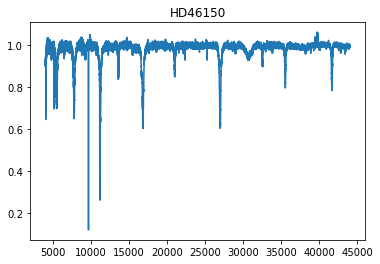

In [5]:
x=[i for i in range(begin,fin)]
plt.plot(x,c[5])
plt.title(d[5])
plt.show()

In [6]:
esnan=np.isnan(a)
for i in range(len(esnan)):
    erro=np.argwhere(np.isnan(a[i]))
    if len(erro)>1:
        print(i,len(erro))

In [7]:
a=util.Normalizar_Datos(a)
c=util.Normalizar_Datos(c)

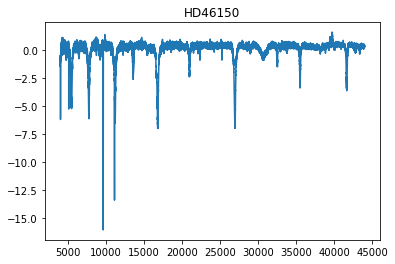

In [8]:
x=[i for i in range(begin,fin)]
plt.plot(x,c[5])
plt.title(d[5])
plt.show()

In [9]:
train,label=util.revolver(a[:49],c)
xtrain,ytrain,xval,yval,xtest,ytest=util.conjuntos(train,label)

(58, 40000) (21, 40000) (19, 40000)


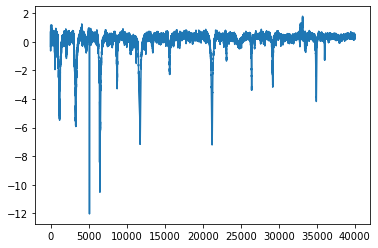

In [10]:
print(xtrain.shape,xval.shape,xtest.shape)
plt.plot(xtrain[50])

In [11]:
n=int((fin-begin-ventana)/(paso))
labelb=[]
labelo=[]
BPartes=[]
OPartes=[]
for i in range(len(temp1)):
    for j in range(n):
        BPartes.append(temp1[i][paso*j:paso*j+ventana])
        labelb.append(temp3[i][paso*j:paso*j+ventana])

for i in range(len(temp2)):
    for j in range(n):
        OPartes.append(temp2[i][paso*j:paso*j+ventana])
        labelo.append(temp4[i][paso*j:paso*j+ventana])
        
xtrain=np.concatenate((BPartes,OPartes))
ytrain=np.concatenate((labelb,labelo))
rd.seed(datetime.now())
empaquetar = list(zip(xtrain, ytrain))
rd.shuffle(empaquetar)
lista1,lista2 = zip(*empaquetar)

NameError: name 'temp1' is not defined

In [11]:
ytrain=to_categorical(ytrain)
yValidation=to_categorical(yval)

In [12]:
optimi=['SGD','RMSprop','Adam','Adadelta','Adagrad','Adamax','Nadam','Ftrl']
modelo=modelos.Densas(2,[100,16],ventana)
modelo.add(layers.BatchNormalization())
modelo.add(layers.Dropout(0.45))
modelo.add(layers.Dense(1,activation='softmax',kernel_regularizer=regularizers.l2(0.001)))

In [14]:
import keras.backend as K
def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [15]:
def precis(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [13]:
modelo.compile(optimizer=optimi[2],loss="binary_crossentropy",metrics=['accuracy'])

In [14]:
historia=modelo.fit(xtrain,ytrain,epochs=100,validation_data=(xval,yval))

Epoch 1/100
2/2 [==============================] - 0s 75ms/step - loss: 7.6260 - accuracy: 0.5000 - val_loss: 5.8106 - val_accuracy: 0.6190
Epoch 2/100
2/2 [==============================] - 0s 14ms/step - loss: 7.6260 - accuracy: 0.5000 - val_loss: 5.8106 - val_accuracy: 0.6190
Epoch 3/100
2/2 [==============================] - 0s 16ms/step - loss: 7.6259 - accuracy: 0.5000 - val_loss: 5.8106 - val_accuracy: 0.6190
Epoch 4/100
2/2 [==============================] - 0s 15ms/step - loss: 7.6259 - accuracy: 0.5000 - val_loss: 5.8105 - val_accuracy: 0.6190
Epoch 5/100
2/2 [==============================] - 0s 16ms/step - loss: 7.6259 - accuracy: 0.5000 - val_loss: 5.8105 - val_accuracy: 0.6190
Epoch 6/100
2/2 [==============================] - 0s 16ms/step - loss: 7.6259 - accuracy: 0.5000 - val_loss: 5.8105 - val_accuracy: 0.6190
Epoch 7/100
2/2 [==============================] - 0s 18ms/step - loss: 7.6259 - accuracy: 0.5000 - val_loss: 5.8105 - val_accuracy: 0.6190
Epoch 8/100
2/2 [===

2/2 [==============================] - 0s 14ms/step - loss: 7.6253 - accuracy: 0.5000 - val_loss: 5.8099 - val_accuracy: 0.6190
Epoch 60/100
2/2 [==============================] - 0s 15ms/step - loss: 7.6253 - accuracy: 0.5000 - val_loss: 5.8099 - val_accuracy: 0.6190
Epoch 61/100
2/2 [==============================] - 0s 15ms/step - loss: 7.6253 - accuracy: 0.5000 - val_loss: 5.8099 - val_accuracy: 0.6190
Epoch 62/100
2/2 [==============================] - 0s 14ms/step - loss: 7.6253 - accuracy: 0.5000 - val_loss: 5.8099 - val_accuracy: 0.6190
Epoch 63/100
2/2 [==============================] - 0s 15ms/step - loss: 7.6253 - accuracy: 0.5000 - val_loss: 5.8099 - val_accuracy: 0.6190
Epoch 64/100
2/2 [==============================] - 0s 18ms/step - loss: 7.6253 - accuracy: 0.5000 - val_loss: 5.8099 - val_accuracy: 0.6190
Epoch 65/100
2/2 [==============================] - 0s 14ms/step - loss: 7.6253 - accuracy: 0.5000 - val_loss: 5.8099 - val_accuracy: 0.6190
Epoch 66/100
2/2 [========

In [15]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4000100   
_________________________________________________________________
dense_1 (Dense)              (None, 16)                1616      
_________________________________________________________________
batch_normalization (BatchNo (None, 16)                64        
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 4,001,797
Trainable params: 4,001,765
Non-trainable params: 32
_________________________________________________________________


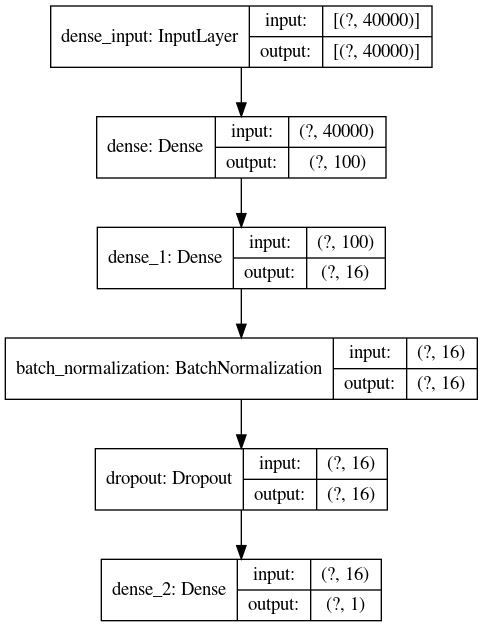

In [23]:
plot_model(modelo, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

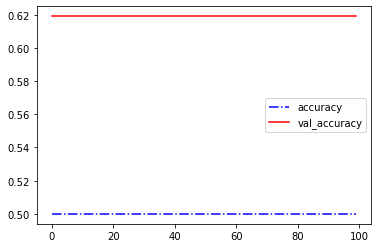

In [35]:
mae=historia.history['accuracy']
loss=historia.history['val_accuracy']
sigue=range(100)
plt.plot(sigue,mae,'b-.',label='accuracy')
plt.plot(sigue,loss,'r-',label='val_accuracy')
plt.legend()

In [21]:
modelo.evaluate(xtest,ytest)

1/1 [==============================] - 0s 895us/step - loss: 4.8160 - accuracy: 0.6842


[4.815974712371826, 0.6842105388641357]

In [22]:
aver=modelo.predict(xtest)
for i in range(len(aver)):
    print(aver[i],ytest[i])

[1.] 1.0
[1.] 1.0
[1.] 1.0
[1.] 1.0
[1.] 1.0
[1.] 1.0
[1.] 0.0
[1.] 0.0
[1.] 1.0
[1.] 0.0
[1.] 0.0
[1.] 1.0
[1.] 1.0
[1.] 0.0
[1.] 0.0
[1.] 1.0
[1.] 1.0
[1.] 1.0
[1.] 1.0


In [ ]:
modelo2=modelos.Recurrente(ventana,8,4,100)
modelo2.summary()

In [ ]:
modelo2.compile(optimizer=optimi[3],loss="binary_crossentropy",metrics=[get_f1])


In [ ]:
historia=modelo2.fit(xtrain,ytrain,epochs=100,validation_data=(xval,yval))

In [ ]:
from keras.applications.inception_v3 import InceptionV3
red2=InceptionV3()

In [ ]:
xtrain1=xtrain.reshape
red2.compile(optimizer='adagrad',loss='binary_crossentropy',metrics=[get_f1])
red2.fit(xtrain,ytrain,epochs=100,validation_data=(xval,yval))

In [ ]:
miss=red.predict((xset3[0:1000][:ventana]-np.mean(xset3))/np.std(xset3))

In [ ]:
plt.plot(miss[0])

In [ ]:
xtrain1=xtrain.reshape((xtrain.shape[0],xtrain.shape[1],1))
xval1=xval.reshape((xval.shape[0],xval.shape[1],1))
xtest=xtest.reshape(xtest.shape[0],xtest.shape[1],1)

In [ ]:
modelo3=modelos.Convolucional(4,4,ventana,4)
modelo3.compile(optimizer='adagrad',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
modelo3.fit(xtrain1,ytrain,epochs=100,validation_data=(xval1,yval))

In [ ]:
modelo3.evaluate(xtest,ytest)

In [ ]:
aver=modelo3.predict(xtest)
for i in range(len(aver)):
    print(aver[i],ytest[i])

In [ ]:
model_json = modelo3.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
modelo3.save_weights("model.h5")
print("Saved model to disk")

In [ ]:
prueba2=a[50:120]
prueba2=prueba2.reshape(prueba2.shape[0],prueba2.shape[1],1)

In [ ]:
modelo3.predict(prueba2)